In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree


In [6]:
ab=pd.read_csv('insurance.csv')

In [5]:
ab.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
ab.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
ab.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# label encoding 

In [3]:
from sklearn.preprocessing import LabelEncoder


In [4]:
le=LabelEncoder()

In [42]:
for column in ab.columns:
    if ab[column].dtype==np.number:
        continue
    ab[column]=le.fit_transform(ab[column])   

/var/folders/72/5h3nwbts3bn0cmdsvtr_ck000000gn/T/ipykernel_925/81998357.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if ab[column].dtype==np.number:


In [41]:
ab.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


In [37]:
ab.tail()

,age,sex,bmi,children,smoker,region,charges
1333,32,1,30.97,3,0,1,10600.5483
1334,0,0,31.92,0,0,0,2205.9808
1335,0,0,36.85,0,0,2,1629.8335
1336,3,0,25.80,0,0,3,2007.9450
1337,43,0,29.07,0,1,1,29141.3603


In [38]:
ab.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

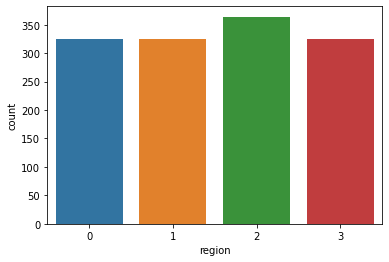

In [25]:
sns.countplot(x='region',data=ab)

<AxesSubplot:xlabel='sex', ylabel='count'>

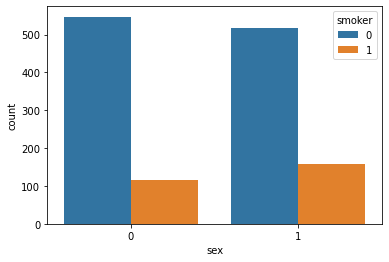

In [26]:
sns.countplot(x='sex',data=ab,hue='smoker')

In [56]:
x=ab.drop('smoker',axis=1)
y=ab['smoker']

In [58]:
x

,age,sex,bmi,children,region,charges
0,1,0,27.900,0,3,16884.92400
1,0,1,33.770,1,2,1725.55230
2,10,1,33.000,3,2,4449.46200
3,15,1,22.705,0,1,21984.47061
4,14,1,28.880,0,1,3866.85520
...,...,...,...,...,...,...
1333,32,1,30.970,3,1,10600.54830
1334,0,0,31.920,0,0,2205.98080
1335,0,0,36.850,0,2,1629.83350
1336,3,0,25.800,0,3,2007.94500


# model_spliting

In [15]:
from sklearn.model_selection import train_test_split as tts


In [59]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30,random_state=50)

In [29]:
xtrain.shape

(936, 6)

In [30]:
xtest.shape

(402, 6)

In [60]:
xtrain.head()

,age,sex,bmi,children,region,charges
69,10,1,23.980,3,2,17663.14420
852,28,0,35.530,0,0,42111.66470
771,35,0,26.700,2,3,11150.78000
33,45,1,28.310,0,1,13770.09790
168,1,0,31.825,1,1,2719.27975


In [55]:
ab.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


# applying_Algorithm

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
clf=DecisionTreeClassifier()

In [63]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Confusion_matrix

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
pred=clf.predict(xtest)

In [67]:
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [68]:
np.array(ytest)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [69]:
confusion_matrix(ytest,pred)

array([[314,   5],
       [  6,  77]])

In [70]:
tp,tn,fp,fn=confusion_matrix(ytest,pred).reshape(-1)

# Accuracy

In [77]:
accurcy=(tp+tn)/(tp+tn+fp+fn)
accurcy

0.7935323383084577

# precision_or_positive_predictive_value_PPV

In [81]:
PPV=tp/(tp+fp)
PPV

0.98125

# Sensitivity,Recall,Hit_rate_or_True_positive_rate(TPR)

In [78]:
TPR=tp/(tp+fn)
TPR

0.80306905370844

# False_Positive_Rate(FPR) or 1-specificity

In [79]:
FPR=fp/(fp+tn)
FPR

0.5454545454545454

# F1_measure

In [82]:
F1_Measure=(PPV+TPR)/2
F1_Measure

0.89215952685422

# Harmonic_mean,F1_Score

In [83]:
F1=(2*PPV*TPR)/(PPV+TPR)
F1

0.8832630098452884

# specificity_selectivity_or_True_negative_rate(TNR)


In [84]:
specificity=tn/(tn+fp)
specificity

0.45454545454545453

# threat_score(TS)_or_critical_success_index(CSI)

In [85]:
CSI=tp/(tp+fn+fp)
CSI

0.7909319899244333

# False_Discovery_Rate(FDR)

In [86]:
FDR=fp/(tp+fp)
FDR

0.01875

# ROC_and_AUC Curve

In [87]:
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score

In [89]:
classification_report(ytest, pred)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       319
           1       0.94      0.93      0.93        83

    accuracy                           0.97       402
   macro avg       0.96      0.96      0.96       402
weighted avg       0.97      0.97      0.97       402



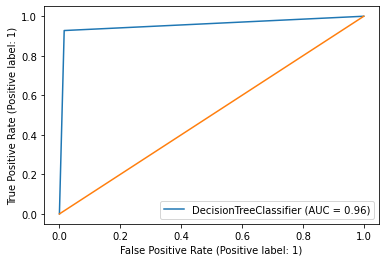

In [90]:
plot_roc_curve(clf,xtest, ytest)
plt.plot([0,1],[0,1])